We have a dataset of Height Vs Body Weigh.Here we will try to present the concept of cost function.How to calculate cost function mannualy and they use Keras to do it.If you like my work please do vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weight-height/weight-height.csv


**Importing Python Module**

In [2]:
import matplotlib.pyplot as plt

**Importing the dataset**

In [3]:
df = pd.read_csv('../input/weight-height/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


**Scatter Plot**

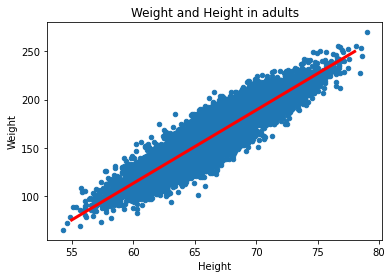

In [4]:
df.plot(kind = 'scatter',x ='Height',y='Weight',title = 'Weight and Height in adults');
# Adding a red line to the plot to represnt the Linear relation
plt.plot([55,78],[75,250],color = 'red',linewidth = 3)

From the Scatter plot we can see that there is a linear correlation betweeen height and weight.

**Creating a Line**

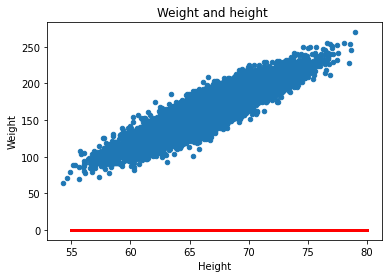

In [5]:
def line(x,w=0,b=0):
    return x*w + b 

x= np.linspace(55,80,100)
yhat = line(x,w=0,b=0)

df.plot(kind = 'scatter',
       x = 'Height',
       y='Weight',
       title = 'Weight and height ')
plt.plot(x,yhat,color='red',linewidth=3);

So we have created a refrence line shown in red color.We will be claculating the cost function with respect with this reference line.This reference is not the best line but we will use it to calculate the cost finction.

**Cost Function**

In [6]:
def mean_squared_error(y_true,y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [7]:
X = df[['Height']].values
y_true = df['Weight'].values

In [8]:
y_pred = line(X)
mean_squared_error(y_true,y_pred)
# To improve speed of calculation we can use
mean_squared_error(y_true,y_pred.ravel())

27093.83757456157

So can see that we have calculated the mean square error value of 27093.This value is very high because our red reference line is far away from the linear line.This we have done do demonstrate the calculation of cost function which is mean squared error in this case.

**Exploring various values of Cost Function**

Linear regression equation is X = wx + b

Where w = Slop 
      b = Y intercept 
      
So we will try to change the value of intercept b and see the affect on the value of the cost function.Our purpose is to minimize the cost function to get the best machine learnng model.

Text(0.5, 0, 'b')

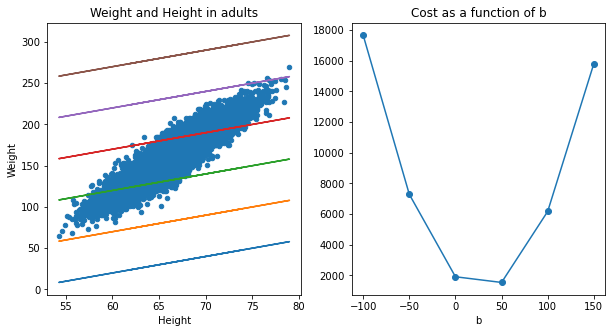

In [9]:
plt.figure(figsize = (10,5))
#We will have two plot one for representing the data and other for the change in cost function
ax1 = plt.subplot(121)
df.plot(kind ='scatter',
       x = 'Height', y= 'Weight',title = 'Weight and Height in adults',ax = ax1)

# Now we calculate the cost function by varying the value of b from -100 to 100 
bbs = np.array([-100,-50,0,50,100,150])
mses = [] 
for b in bbs:
    y_pred = line(X,w=2,b=b)
    mse = mean_squared_error(y_true,y_pred)
    mses.append(mse)
    plt.plot(X,y_pred)

# Plotting the cost function for various values of b
ax2 = plt.subplot(122)
plt.plot(bbs,mses,'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

Now we will be making use of Keraa,Linear regression to make a calculation of cost function.

**Linear Regression with Keras.**

In [10]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.optimizers import Adam,SGD

Using TensorFlow backend.


In [11]:
model = Sequential()
model.add(Dense(1,input_shape=(1,)))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(Adam(lr = 0.8),'mean_squared_error')

In [14]:
model.fit(X,y_true,epochs = 40)

Epoch 1/40
10000/10000 [==============================] - 0s 49us/step - loss: 835.3903
Epoch 2/40
10000/10000 [==============================] - 0s 28us/step - loss: 552.2976
Epoch 3/40
10000/10000 [==============================] - 0s 28us/step - loss: 497.7765
Epoch 4/40
10000/10000 [==============================] - 0s 27us/step - loss: 464.1491
Epoch 5/40
10000/10000 [==============================] - 0s 28us/step - loss: 416.6330
Epoch 6/40
10000/10000 [==============================] - 0s 28us/step - loss: 375.7735
Epoch 7/40
10000/10000 [==============================] - 0s 27us/step - loss: 336.8622
Epoch 8/40
10000/10000 [==============================] - 0s 28us/step - loss: 316.9179
Epoch 9/40
10000/10000 [==============================] - 0s 28us/step - loss: 295.4854
Epoch 10/40
10000/10000 [==============================] - 0s 28us/step - loss: 253.7420
Epoch 11/40
10000/10000 [==============================] - 0s 27us/step - loss: 241.1918
Epoch 12/40
10000/10000 [=====

With Linear Regression using Keras we can see that our loss value is around 182 with is very low compared to the early calculation we did.

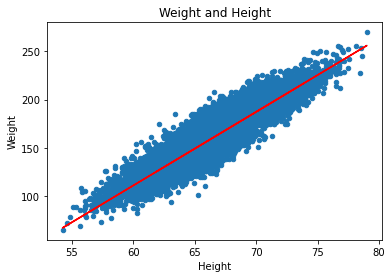

In [15]:
y_pred = model.predict(X)
df.plot(kind='scatter',
        x = 'Height',
        y = 'Weight',
        title = 'Weight and Height')
plt.plot(X,y_pred,color = 'red');

**Getting the Weight and the intercept value**

In [16]:
W , B = model.get_weights()

In [17]:
W

array([[7.6581125]], dtype=float32)

In [18]:
B

array([-348.74457], dtype=float32)

So we can now say that the linear equation would be y = WX = B ie y = 7.65X - 348.52